# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2

from keras.utils import to_categorical, load_img
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## 2. Load in the data

(100, 100)


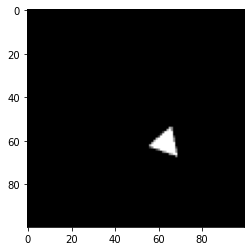

In [4]:
data_direc = 'geometric shapes dataset'
classes = []
#Obtain the name of the class directories we will work with
for i in os.listdir(data_direc):
    classes.append(i)

#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

label = 0
for i in classes:
    path = data_direc+'/'+str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_AREA) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list
    label = label + 1

plt.imshow(data[29999], cmap='gray')
print(data[100].shape)

## 3. Split data into training and testing

In [5]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.25, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 100, 100, 1)
(7500, 100, 100, 1)
(22500, 3)
(7500, 3)


In [6]:
#add data augmentation to prevent overfitting

## 4. Convolutional Neural Network Setup

In [7]:
#TO DO: add dropouts/l1 or l2 regularization to help prevent overfitting
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = 2, padding = "same", activation = "relu", input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 16, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

#fully connected neural network
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

## 5. Compile and fit the model

In [8]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model on the training and testing sets
history = model.fit(x_train, y_train, epochs = 10, batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/10
44/44 [==============================] - 11s 234ms/step - loss: 1.0953 - accuracy: 0.4025 - val_loss: 1.0212 - val_accuracy: 0.5160
Epoch 2/10
44/44 [==============================] - 11s 240ms/step - loss: 0.9886 - accuracy: 0.5117 - val_loss: 0.9644 - val_accuracy: 0.5329
Epoch 3/10
44/44 [==============================] - 11s 250ms/step - loss: 0.9483 - accuracy: 0.5472 - val_loss: 0.9376 - val_accuracy: 0.5613
Epoch 4/10
44/44 [==============================] - 11s 258ms/step - loss: 0.9175 - accuracy: 0.5703 - val_loss: 0.9015 - val_accuracy: 0.5772
Epoch 5/10
44/44 [==============================] - 11s 261ms/step - loss: 0.8723 - accuracy: 0.5906 - val_loss: 0.8355 - val_accuracy: 0.6148
Epoch 6/10
44/44 [==============================] - 13s 292ms/step - loss: 0.8061 - accuracy: 0.6183 - val_loss: 0.7698 - val_accuracy: 0.6552
Epoch 7/10
44/44 [==============================] - 13s 295ms/step - loss: 0.7420 - accuracy: 0.6568 - val_loss: 0.7269 - val_accuracy: 0.6471

In [9]:
#add early stopping to select best epochs

In [10]:
model_accuracy = model.evaluate(x_test,y_test)
print("accuracy of model: ", model_accuracy[1])

235/235 [==============================] - 1s 5ms/step - loss: 0.5867 - accuracy: 0.7461
accuracy of model:  0.7461333274841309
